In [54]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#reading csv file
df = pd.read_csv('India_GDP_1960-2022.csv')
df.head(10)

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
5,4.0,2017,2651.47,158480,6.8
6,5.0,2016,2294.8,138640,8.26
7,6.0,2015,2103.59,128480,8
8,7.0,2014,2039.13,125920,7.41
9,8.0,2013,1856.72,116000,6.39


In [55]:
df = df.loc[1:62, 'India GDP - Historical Data':'India GDP - Historical Data.3']
df
#droping unnecassary column and first row

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
5,2017,2651.47,158480,6.8
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [56]:
df.info()
#get info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   India GDP - Historical Data    62 non-null     object
 1   India GDP - Historical Data.1  62 non-null     object
 2   India GDP - Historical Data.2  62 non-null     object
 3   India GDP - Historical Data.3  62 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [57]:
df.isnull().sum()
#check is there any null value

India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [58]:
df.dtypes
#checking data types

India GDP - Historical Data      object
India GDP - Historical Data.1    object
India GDP - Historical Data.2    object
India GDP - Historical Data.3    object
dtype: object

In [59]:
df['India GDP - Historical Data']=df['India GDP - Historical Data'].astype('float64')
df['India GDP - Historical Data.1']=df['India GDP - Historical Data.1'].astype('float64')
df['India GDP - Historical Data.2']=df['India GDP - Historical Data.2'].astype('float64')
df['India GDP - Historical Data.3']=df['India GDP - Historical Data.3'].astype('float64')
df.dtypes
#converting their data type to float

India GDP - Historical Data      float64
India GDP - Historical Data.1    float64
India GDP - Historical Data.2    float64
India GDP - Historical Data.3    float64
dtype: object

In [60]:
df.rename(columns={'India GDP - Historical Data': 'Year', 'India GDP - Historical Data.1': 'GDP in (Billion)$','India GDP - Historical Data.2':'Per Capita in rupees', 'India GDP - Historical Data.3':'Growth%'}, inplace=True)
df
#rename columns

,Year,GDP in (Billion)$,Per Capita in rupees,Growth%
1,2021.0,3173.40,182160.0,8.95
2,2020.0,2667.69,154640.0,-6.60
3,2019.0,2831.55,165760.0,3.74
4,2018.0,2702.93,159840.0,6.45
5,2017.0,2651.47,158480.0,6.80
...,...,...,...,...
58,1964.0,56.48,9280.0,7.45
59,1963.0,48.42,8080.0,5.99
60,1962.0,42.16,7200.0,2.93
61,1961.0,39.23,6800.0,3.72


In [61]:
df.describe()

#getting statical values

,Year,GDP in (Billion)$,Per Capita in rupees,Growth%
count,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,699.036452,48210.322581,5.007258
std,18.041619,867.228056,49386.668108,3.319231
min,1960.000000,37.030000,6560.000000,-6.600000
25%,1975.250000,100.327500,12920.000000,3.725000
50%,1990.500000,292.125000,27440.000000,5.620000
75%,2005.750000,910.290000,62720.000000,7.525000
max,2021.000000,3173.400000,182160.000000,9.630000


In [62]:
df.duplicated().any()

#check if there is any duplicated 

False

<AxesSubplot:>

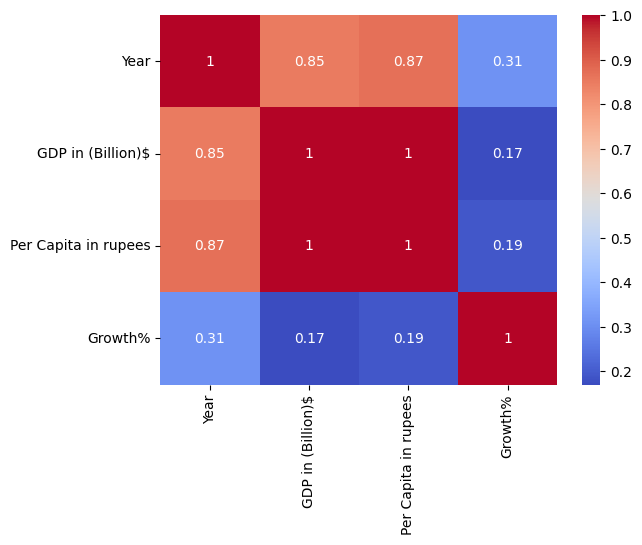

In [63]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#look for correlations and visualize them

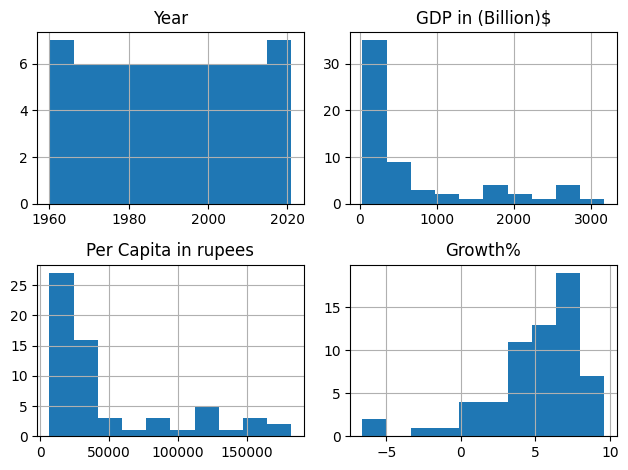

In [64]:
df.hist()
plt.tight_layout()

#look for features' histograms

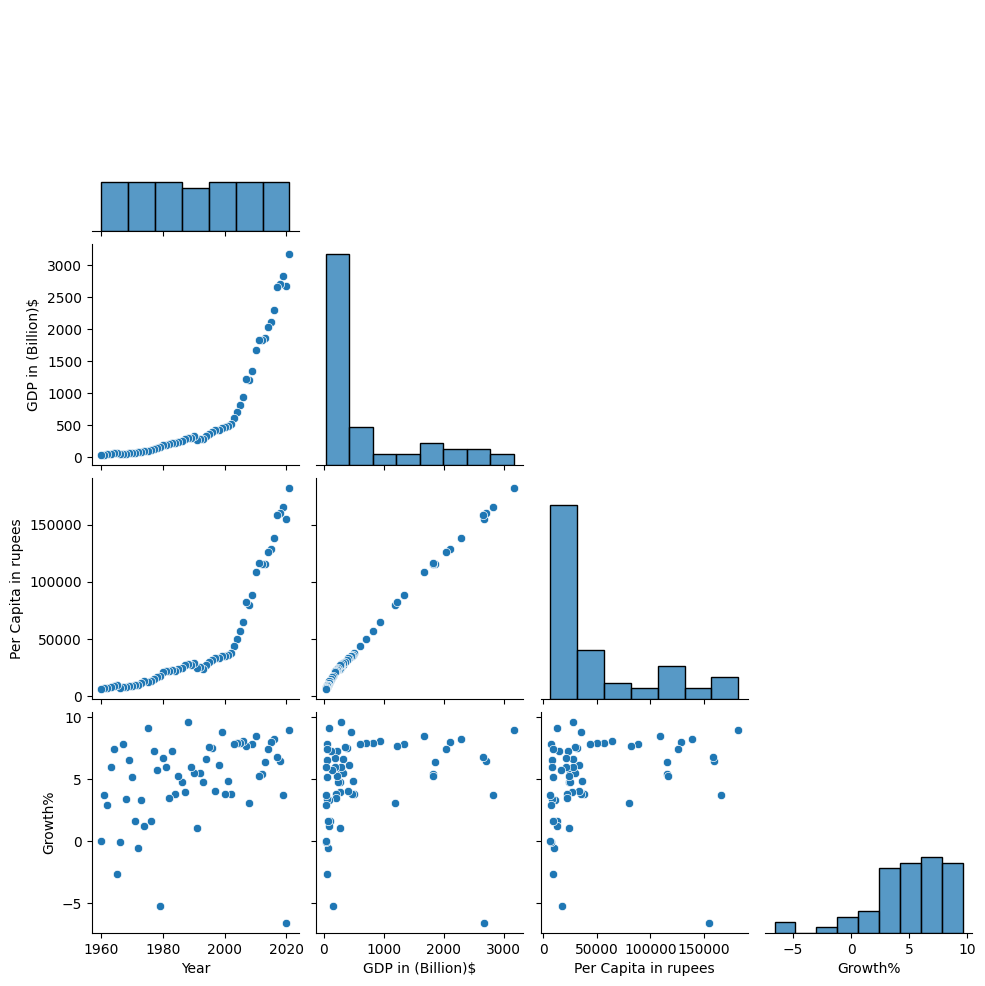

In [65]:

sns.pairplot(df, corner=True)

#look for relation graphs


Text(0.5, 1.0, 'Year vs GPD')

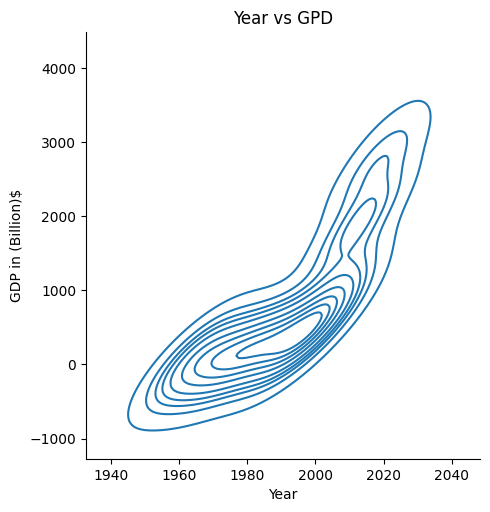

In [66]:
sns.displot(df, x="Year" , y="GDP in (Billion)$" , kind="kde")
plt.xlabel('Year')
plt.ylabel('GDP in (Billion)$')
plt.title('Year vs GPD')


Text(0.5, 1.0, 'Year vs Per Capita in rupees')

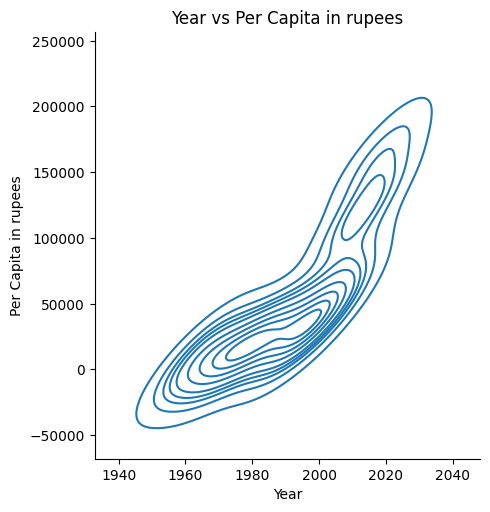

In [67]:
sns.displot(df, x="Year" , y="Per Capita in rupees" , kind="kde")
plt.xlabel('Year')
plt.ylabel('Per Capita in rupees')
plt.title('Year vs Per Capita in rupees')

Text(0.5, 1.0, 'PER CAPITA vs GDP')

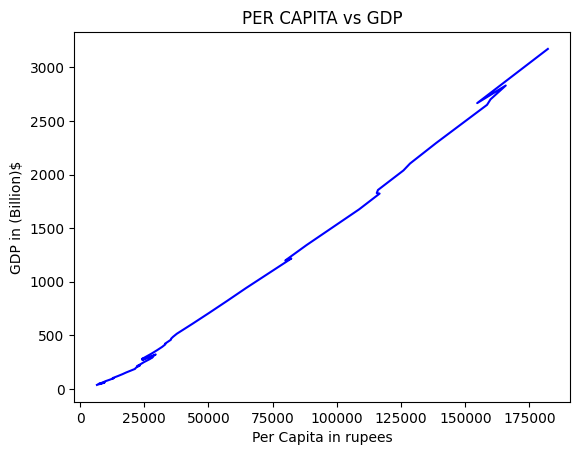

In [68]:
plt.plot(df['Per Capita in rupees'],df['GDP in (Billion)$'],color='blue', linestyle='-')
plt.xlabel('Per Capita in rupees')
plt.ylabel('GDP in (Billion)$')
plt.title('PER CAPITA vs GDP')

Text(0.5, 1.0, 'Year vs Growth')

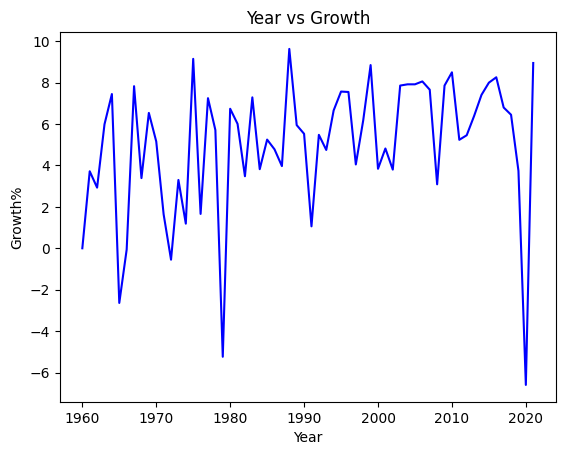

In [69]:
plt.plot(df['Year'],df['Growth%'],color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Growth%')
plt.title('Year vs Growth')

In [70]:
X=df[['Year','Per Capita in rupees']]
y=df['GDP in (Billion)$']


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#split train and test

In [77]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
LR_predictions=lr.predict(X_test)
print("Accuracy of Logistic Regression: {}%".format(lr.score(X_test, y_test) * 100 ), "%\n")

Accuracy of Logistic Regression: 99.8613030063379% %



In [73]:
#Decision Tree Regression
dtr= DecisionTreeRegressor(random_state=5,max_depth=4)
dtr.fit(X_train,y_train)
DecisionTree_predictions=dtr.predict(X_test)
print("Accuracy of Decision Tree: {}%".format(dtr.score(X_test, y_test) * 100 ), "%\n")

Accuracy of Decision Tree: 98.44428813509857% %



In [75]:
RF = RandomForestRegressor(n_estimators=63)
RF.fit(X_train, y_train)
RF_predictions=RF.predict(X_test)
print("Accuracy of Random Forest: {}%".format(RF.score(X_test, y_test) * 100 ), "%\n")


Accuracy of Random Forest: 98.36068441625906% %



In [74]:
#numbers of our samples is low so it caused overfitting